# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [ ]:
def train(X, T, learning_rate, n_epochs, verbose=False):
    Xtrain = X
    Ttrain = T

    # Calculate means and standard deviations of each column in X and T
    Xmeans = Xtrain.mean(0)
    Xstds = Xtrain.std(0)
    
    Tmeans = Ttrain.mean(0)
    Tstds = Ttrain.std(0)

    # Use the means and standard deviations to standardize X and T
    Xtrain = (Xtrain - Xmeans) / Xstds
    Ttrain = (Ttrain - Tmeans) / Tstds

    # Insert the column of constant 1's as a new initial column in X
    Xtrain = np.insert(Xtrain, 0, 1, 1)
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    n_samples, n_inputs = Xtrain.shape
    w = np.zeros((n_inputs, 1))

    for epoch in range(n_epochs):
        sqerror_sum = 0

        for n in range(n_samples):
            # Use current weight values to predict output for sample n, then
            y = Xtrain[n:n + 1, :] @ w

            # calculate the error, and
            error = Ttrain[n:n + 1, :] - y

            # update the weight values.
            w += learning_rate * Xtrain[n:n + 1, :].T * error
            
            # Add the squared error to sqerror_sum
            sqerror_sum += error ** 2
            
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.5f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [ ]:
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans']) / model['Xstds']
    X = np.insert(X, 0, 1, 1)

    # Predict output values using weights in model
    predict = X @ model['w']

    # Unstandardize the predicted output values using Tmeans and Tstds in model
    unstandardize = (predict * model['Tstds']) + model['Tmeans']

    # Return the unstandardized output values
    return unstandardize

In [ ]:
def rmse(A, B):
    return np.sqrt(np.mean( (A - B)**2 ))

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

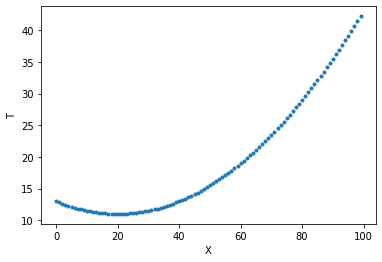

In [ ]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [ ]:
model = train(X, T, 0.01, 50, verbose=True)
model

Epoch 5 RMSE 0.39553
Epoch 10 RMSE 0.39989
Epoch 15 RMSE 0.39992
Epoch 20 RMSE 0.39992
Epoch 25 RMSE 0.39992
Epoch 30 RMSE 0.39992
Epoch 35 RMSE 0.39992
Epoch 40 RMSE 0.39992
Epoch 45 RMSE 0.39992
Epoch 50 RMSE 0.39992


{'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'w': array([[-0.00576098],
        [ 1.05433338]])}

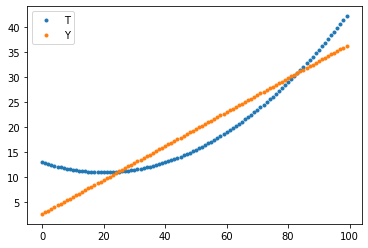

In [ ]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend();

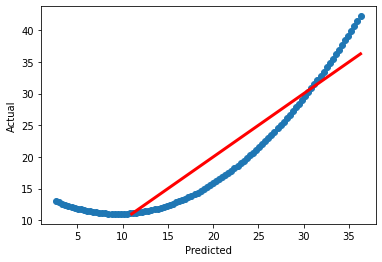

In [ ]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3);

In [ ]:
rmse(Y,T)

3.941399759526915

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [ ]:
df = pandas.read_csv('https://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt', delim_whitespace=True, na_values='***')

In [ ]:
df

,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,rhmxtm,rhmin,rhmntm,sr,wrun,pp,st5mx,st5mxtm,st5mn,st5mntm,st15mx,st15mxtm,st15mn,st15mntm,volts,year,gust,gusttm,gusdir,etr_asce
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,05:10,0.595,15:00,5.319,62.924,0.000,NaN,NaN,NaN,NaN,-1.803,00:00,-3.195,23:00,NaN,2019.0,5.155,08:10,NaN,0.324
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,04:20,0.216,15:10,7.388,27.234,0.508,NaN,NaN,NaN,NaN,-2.941,19:00,-4.802,11:00,NaN,2019.0,4.332,11:50,NaN,0.521
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,01:50,0.175,13:30,6.529,28.465,0.000,NaN,NaN,NaN,NaN,-1.979,22:00,-4.639,10:00,NaN,2019.0,4.096,15:40,NaN,0.729
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,06:00,0.202,14:30,6.202,36.616,0.000,NaN,NaN,NaN,NaN,-0.963,23:00,-2.768,10:00,NaN,2019.0,4.096,12:30,NaN,0.893
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,06:50,0.184,14:00,5.931,34.283,0.000,NaN,NaN,NaN,NaN,-0.350,23:00,-1.401,11:00,NaN,2019.0,4.077,12:20,NaN,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,21:20,0.565,10:30,4.255,34.897,0.000,NaN,NaN,NaN,NaN,0.308,06:00,0.257,14:00,NaN,2019.0,4.469,16:00,NaN,0.473
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,04:00,0.477,22:30,2.994,108.310,0.000,NaN,NaN,NaN,NaN,0.298,20:00,0.264,10:00,NaN,2019.0,10.623,12:20,NaN,0.681
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,22:50,0.267,15:50,5.551,104.831,4.064,NaN,NaN,NaN,NaN,0.288,00:00,0.219,23:00,NaN,2019.0,11.486,07:10,NaN,1.039
363,2019,12,30,-5.427,1.293,13:40,-12.147,06:20,0.226,0.833,06:50,0.278,12:00,6.694,36.863,0.508,NaN,NaN,NaN,NaN,0.200,00:00,-0.150,23:00,NaN,2019.0,4.586,14:30,NaN,0.504


## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [ ]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [ ]:
df = pandas.read_csv('https://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt', delim_whitespace=True, na_values='***', usecols = lambda column : column not in ["st5mx" , "st5mxtm", "st5mn", "st5mntm", "volts", "gusdir"])

In [ ]:
df

,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,rhmxtm,rhmin,rhmntm,sr,wrun,pp,st15mx,st15mxtm,st15mn,st15mntm,year,gust,gusttm,etr_asce
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,05:10,0.595,15:00,5.319,62.924,0.000,-1.803,00:00,-3.195,23:00,2019.0,5.155,08:10,0.324
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,04:20,0.216,15:10,7.388,27.234,0.508,-2.941,19:00,-4.802,11:00,2019.0,4.332,11:50,0.521
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,01:50,0.175,13:30,6.529,28.465,0.000,-1.979,22:00,-4.639,10:00,2019.0,4.096,15:40,0.729
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,06:00,0.202,14:30,6.202,36.616,0.000,-0.963,23:00,-2.768,10:00,2019.0,4.096,12:30,0.893
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,06:50,0.184,14:00,5.931,34.283,0.000,-0.350,23:00,-1.401,11:00,2019.0,4.077,12:20,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,21:20,0.565,10:30,4.255,34.897,0.000,0.308,06:00,0.257,14:00,2019.0,4.469,16:00,0.473
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,04:00,0.477,22:30,2.994,108.310,0.000,0.298,20:00,0.264,10:00,2019.0,10.623,12:20,0.681
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,22:50,0.267,15:50,5.551,104.831,4.064,0.288,00:00,0.219,23:00,2019.0,11.486,07:10,1.039
363,2019,12,30,-5.427,1.293,13:40,-12.147,06:20,0.226,0.833,06:50,0.278,12:00,6.694,36.863,0.508,0.200,00:00,-0.150,23:00,2019.0,4.586,14:30,0.504


In [ ]:
df.isna().sum()

Year        0
Mo          0
Dy          0
tave        0
tmax        0
mxtm        0
tmin        0
mntm        0
vp          0
rhmax       0
rhmxtm      0
rhmin       0
rhmntm      0
sr          0
wrun        0
pp          0
st15mx      0
st15mxtm    0
st15mn      0
st15mntm    0
year        0
gust        0
gusttm      0
etr_asce    0
dtype: int64

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

In [ ]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

In [ ]:
df['next tave'] = ''
# data = df.iloc[30:40].values
# T = data[:, -1:]
# X = data[:, 0:-1]
# names = df.columns
# Xnames = names[:-1]
# Tname = names[-1:]
# print("Xnames = ", Xnames)
# print("Tnames = ", Tnames)

## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [ ]:
Xnames = ['bias','tave','tmax','tmin','vp','rhmax','rhmin','pp','gust']

In [ ]:
XnamesAdditional = ['bias','tave','tmax','tmin','vp','rhmax','rhmin','pp','gust', 'sr', 'wrun', 'st15mx', 'st15mn']

In [ ]:
# useful_data = np.array(df.iloc[30:40][['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']])
useful_data = np.array(df[['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']])
X = useful_data[:-1, :]
T = useful_data[1:, 0:1]

In [ ]:
# useful_data = np.array(df.iloc[30:40][['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']])
useful_data_additional = np.array(df[['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust', 'sr', 'wrun', 'st15mx', 'st15mn']])
X_additional = useful_data_additional[:-1, :]
T_additional = useful_data_additional[1:, 0:1]

In [ ]:
print(X)
print(T)

[[-13.535 -10.073 -16.997 ...   0.595   0.      5.155]
 [ -5.791   6.01  -17.591 ...   0.216   0.508   4.332]
 [  1.374  13.444 -10.696 ...   0.175   0.      4.096]
 ...
 [ -2.695  -1.102  -4.288 ...   0.477   0.     10.623]
 [ -3.731   1.871  -9.333 ...   0.267   4.064  11.486]
 [ -5.427   1.293 -12.147 ...   0.278   0.508   4.586]]
[[ -5.791]
 [  1.374]
 [  4.544]
 [  4.465]
 [  6.484]
 [  3.951]
 [  0.073]
 [ -1.611]
 [  6.022]
 [  3.194]
 [  1.587]
 [ -0.441]
 [  0.164]
 [  1.711]
 [  4.581]
 [  3.755]
 [  1.748]
 [  0.794]
 [  3.699]
 [  1.509]
 [ -2.389]
 [ -2.238]
 [ -4.389]
 [ -4.567]
 [  0.199]
 [  5.772]
 [ -2.951]
 [ -5.122]
 [ -3.679]
 [  1.366]
 [  3.617]
 [  4.365]
 [  8.895]
 [  1.934]
 [ -0.69 ]
 [ -9.659]
 [-15.989]
 [ -9.802]
 [ -5.18 ]
 [ -4.825]
 [ -3.589]
 [  2.783]
 [  6.673]
 [  5.976]
 [  2.393]
 [ -0.857]
 [ -4.927]
 [-11.115]
 [ -8.522]
 [ -5.496]
 [ -4.461]
 [ -5.376]
 [ -0.835]
 [  2.057]
 [  0.91 ]
 [  0.546]
 [ -5.434]
 [  0.958]
 [  3.836]
 [ -9.381]
 [-1

In [ ]:
print(Xnames)
print(XnamesAdditional)


['bias', 'tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
['bias', 'tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust', 'sr', 'wrun', 'st15mx', 'st15mn']


In [ ]:
useful_data

array([[-13.535, -10.073, -16.997, ...,   0.595,   0.   ,   5.155],
       [ -5.791,   6.01 , -17.591, ...,   0.216,   0.508,   4.332],
       [  1.374,  13.444, -10.696, ...,   0.175,   0.   ,   4.096],
       ...,
       [ -3.731,   1.871,  -9.333, ...,   0.267,   4.064,  11.486],
       [ -5.427,   1.293, -12.147, ...,   0.278,   0.508,   4.586],
       [ -4.175,   4.81 , -13.16 , ...,   0.241,   0.   ,   5.566]])

In [ ]:
X.shape

(364, 8)

In [ ]:
T.shape

(364, 1)

## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

In [ ]:
model_additional = train(X_additional, T_additional, 0.000001, 10000, verbose=True)

Epoch 1000 RMSE 0.32963
Epoch 2000 RMSE 0.30887
Epoch 3000 RMSE 0.30586
Epoch 4000 RMSE 0.30443
Epoch 5000 RMSE 0.30349
Epoch 6000 RMSE 0.30275
Epoch 7000 RMSE 0.30212
Epoch 8000 RMSE 0.30157
Epoch 9000 RMSE 0.30108
Epoch 10000 RMSE 0.30063


In [ ]:
model = train(X, T, 0.000001, 7000, verbose=True)

Epoch 700 RMSE 0.48918
Epoch 1400 RMSE 0.36921
Epoch 2100 RMSE 0.34518
Epoch 2800 RMSE 0.33862
Epoch 3500 RMSE 0.33583
Epoch 4200 RMSE 0.33432
Epoch 4900 RMSE 0.33341
Epoch 5600 RMSE 0.33285
Epoch 6300 RMSE 0.33248
Epoch 7000 RMSE 0.33223


In [ ]:
model = train(X, T, 0.001, 20, verbose=True)

Epoch 2 RMSE 0.37014
Epoch 4 RMSE 0.33721
Epoch 6 RMSE 0.33421
Epoch 8 RMSE 0.33336
Epoch 10 RMSE 0.33307
Epoch 12 RMSE 0.33296
Epoch 14 RMSE 0.33291
Epoch 16 RMSE 0.33289
Epoch 18 RMSE 0.33287
Epoch 20 RMSE 0.33287


In [ ]:
model_additional = train(X_additional, T_additional, 0.001, 2000, verbose=True)

Epoch 200 RMSE 0.29657
Epoch 400 RMSE 0.29654
Epoch 600 RMSE 0.29653
Epoch 800 RMSE 0.29653
Epoch 1000 RMSE 0.29653
Epoch 1200 RMSE 0.29653
Epoch 1400 RMSE 0.29653
Epoch 1600 RMSE 0.29653
Epoch 1800 RMSE 0.29653
Epoch 2000 RMSE 0.29653


In [ ]:
# Seems to give us our best RMSE for the initial 8 columns
model = train(X, T, 0.0001, 2000, verbose=True)

Epoch 200 RMSE 0.33178
Epoch 400 RMSE 0.33176
Epoch 600 RMSE 0.33175
Epoch 800 RMSE 0.33174
Epoch 1000 RMSE 0.33174
Epoch 1200 RMSE 0.33174
Epoch 1400 RMSE 0.33174
Epoch 1600 RMSE 0.33174
Epoch 1800 RMSE 0.33174
Epoch 2000 RMSE 0.33173


In [ ]:
# Seems to give us our best RMSE values for the additional columns
model_additional = train(X_additional, T_additional, 0.0001, 2000, verbose=True)

Epoch 200 RMSE 0.29802
Epoch 400 RMSE 0.29612
Epoch 600 RMSE 0.29558
Epoch 800 RMSE 0.29537
Epoch 1000 RMSE 0.29527
Epoch 1200 RMSE 0.29521
Epoch 1400 RMSE 0.29517
Epoch 1600 RMSE 0.29515
Epoch 1800 RMSE 0.29514
Epoch 2000 RMSE 0.29513


We decided to use a learning rate of .0001 with 2000 epochs because it resulted with the lowest rmse value for both models while running fast. 

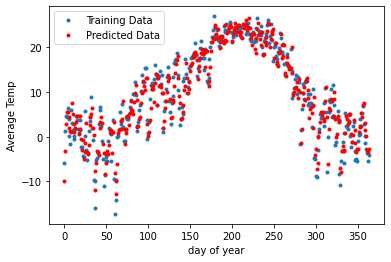

In [ ]:
Y = use(X, model)
plt.plot(T, '.', label='Training Data')
plt.plot(Y, 'r.', label='Predicted Data')
plt.xlabel('day of year')
plt.ylabel('Average Temp')
plt.legend();

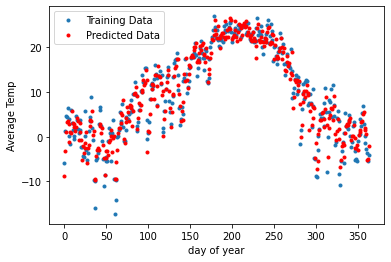

In [ ]:
Y_additional = use(X_additional, model_additional)
plt.plot(T, '.', label='Training Data')
plt.plot(Y_additional, 'r.', label='Predicted Data')
plt.xlabel('day of year')
plt.ylabel('Average Temp')
plt.legend();

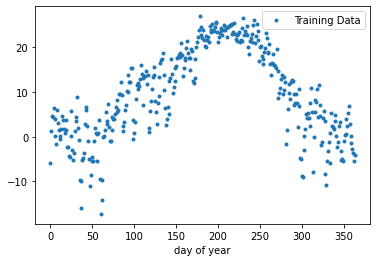

In [ ]:
plt.plot(T, '.', label='Training Data')
plt.xlabel('day of year')
plt.legend();

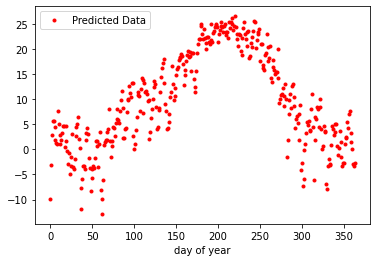

In [ ]:

plt.plot(Y, 'r.', label='Predicted Data')
plt.xlabel('day of year')
plt.legend();

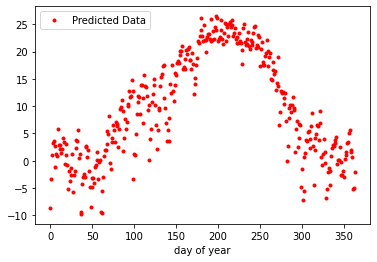

In [ ]:
plt.plot(Y_additional, 'r.', label='Predicted Data')
plt.xlabel('day of year')
plt.legend();

# Discussion of results with basic 8 columns
Seems our model is more sporadic when the avearge temperature is more sporadic - which seems to happen in the colder months of the year.  We are still within the same bounds as the actual data. RMSE calc shows about 3.3 degrees celsius.  The temperature spread ranges from ~ -20 to ~30 degrees celsius so an error of just over 3 degrees demonstrates a stong model.
 
The appearance of more error during the cold months seems to be due to the fact that there is a larger temperature variation from day to day in the cold months.  Additional training data from multiple years would help lower our error.

After running our model with the suggested 8 columns, we looked at the data to pull in other features that we thought could have an effect.  We added in Solar Radiation, Wind Run, and min/max Soil Temperature at 15 cm.  SR and WRun both played a significant role on reducing our RMSE while the soil temperatures didn't adjust the model much at all. Also after adding the extra features there was a decrease in the weight values of Tmax, Tave, vp and gust. We believe this to be due to the additional features impact on the orignal eight i.e. gust and Wind run(Wrun).

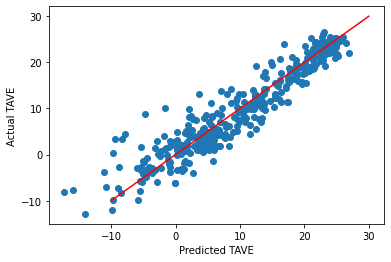

In [ ]:
plt.plot(T, Y, 'o')
plt.xlabel('Predicted TAVE')
plt.ylabel('Actual TAVE');
plt.plot([-10,30],[-10,30],'r');

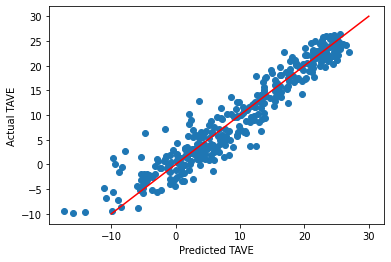

In [ ]:
plt.plot(T, Y_additional, 'o')
plt.xlabel('Predicted TAVE')
plt.ylabel('Actual TAVE');
plt.plot([-10,30],[-10,30],'r');

In [ ]:
rmse(Y, T)

3.3158901848022344

In [ ]:
rmse(Y_additional, T_additional)

2.9494080499066024

## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [ ]:
sortedOrder = np.argsort(np.abs(model['w'].flat))[::-1]
Xnames = np.array(Xnames)
for wi, name in zip(model['w'].flat[sortedOrder], Xnames[sortedOrder]):
    print(f'{wi:8.3f}  {name:s}')

   0.251  tave
   0.250  tmax
   0.238  tmin
   0.226  vp
  -0.102  gust
  -0.039  rhmin
  -0.029  rhmax
   0.024  pp
  -0.000  bias


In [ ]:
sortedOrder = np.argsort(np.abs(model_additional['w'].flat))[::-1]
XnamesAdditional = np.array(XnamesAdditional)
for wi, name in zip(model_additional['w'].flat[sortedOrder], XnamesAdditional[sortedOrder]):
    print(f'{wi:8.3f}  {name:s}')

   0.325  tmin
   0.202  tave
   0.192  sr
  -0.145  wrun
   0.103  vp
   0.089  tmax
   0.064  st15mx
  -0.036  rhmax
   0.033  st15mn
   0.016  pp
   0.012  rhmin
  -0.006  gust
   0.000  bias


In [ ]:
model

{'Tmeans': array([9.69735165]),
 'Tstds': array([9.99956005]),
 'Xmeans': array([ 9.67163736, 16.92682967,  2.41645879,  0.80093132,  0.84943956,
         0.31448901,  1.14648901,  7.78864286]),
 'Xstds': array([10.04712202, 11.24335508,  9.36897334,  0.47412505,  0.10822301,
         0.17059411,  2.99470258,  2.86809983]),
 'w': array([[-0.00036834],
        [ 0.25139679],
        [ 0.25047456],
        [ 0.23848164],
        [ 0.22585272],
        [-0.0289884 ],
        [-0.03876477],
        [ 0.02414865],
        [-0.10209242]])}

In [ ]:
model_additional

{'Tmeans': array([9.69735165]),
 'Tstds': array([9.99956005]),
 'Xmeans': array([ 9.67163736, 16.92682967,  2.41645879,  0.80093132,  0.84943956,
         0.31448901,  1.14648901,  7.78864286, 10.79595879, 60.4973544 ,
        12.8157967 ,  9.95957967]),
 'Xstds': array([10.04712202, 11.24335508,  9.36897334,  0.47412505,  0.10822301,
         0.17059411,  2.99470258,  2.86809983,  5.01998576, 22.69066427,
         9.77617547,  8.43624504]),
 'w': array([[ 4.47050297e-05],
        [ 2.01687676e-01],
        [ 8.91329685e-02],
        [ 3.25470549e-01],
        [ 1.03410590e-01],
        [-3.64262889e-02],
        [ 1.16765855e-02],
        [ 1.62599025e-02],
        [-6.25281626e-03],
        [ 1.91772227e-01],
        [-1.45129607e-01],
        [ 6.40816905e-02],
        [ 3.30458662e-02]])}

## Grading and Check-in

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

In [ ]:
T = data[1:, 0:1] -  data[:-1, 0:1]

NameError: ignored

Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.